In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


LOADING LIBRARIES

In [ ]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/anemia.csv")
data

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


APPLYING PREPROCESSING TECHNIQUES

head():The head() method returns a specified number of rows, string from the top.

-->The head() method returns the first 5 rows if a number is not specified.

In [ ]:
data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


tail():The tail() method returns a specified number of last rows.

-->The tail() method returns the last 5 rows if a number is not specified.

In [ ]:
data.tail()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0
1420,0,11.8,21.2,28.4,98.1,1


The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

In [ ]:
data.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


The `isnull().sum()` method in Python's pandas library efficiently counts the number of missing or null values in each column of a DataFrame.

In [ ]:
data.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

The duplicated() method returns a Series with True and False values that describe which rows in the DataFrame are duplicated and not

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1416     True
1417     True
1418     True
1419     True
1420     True
Length: 1421, dtype: bool

The drop_duplicates() method removes duplicate rows.

In [ ]:
data=data.drop_duplicates()

In [ ]:
data

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
946,0,11.8,21.2,28.4,98.1,1
1156,1,15.1,21.3,32.4,100.6,0
1160,1,14.8,19.5,32.2,72.1,0
1376,1,13.2,20.4,28.0,97.4,1


In [ ]:
x=data.drop(['Result'],axis=1)
y=data['Result']
print(x)
print(y)

      Gender  Hemoglobin   MCH  MCHC    MCV
0          1        14.9  22.7  29.1   83.7
1          0        15.9  25.4  28.3   72.0
2          0         9.0  21.5  29.6   71.2
3          0        14.9  16.0  31.4   87.5
4          1        14.7  22.0  28.2   99.5
...      ...         ...   ...   ...    ...
946        0        11.8  21.2  28.4   98.1
1156       1        15.1  21.3  32.4  100.6
1160       1        14.8  19.5  32.2   72.1
1376       1        13.2  20.4  28.0   97.4
1396       1        13.0  26.0  31.4   82.8

[534 rows x 5 columns]
0       0
1       0
2       1
3       0
4       0
       ..
946     1
1156    0
1160    0
1376    1
1396    1
Name: Result, Length: 534, dtype: int64


SPLITTING THE DATA SET

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,Gender,Hemoglobin,MCH,MCHC,MCV
906,0,11.7,19.9,28.9,71.6
716,1,15.2,29.0,28.2,90.2
943,1,12.1,28.3,30.4,86.9
930,1,11.6,24.6,28.2,96.7
729,1,14.0,20.1,32.4,71.1
...,...,...,...,...,...
71,1,11.2,18.5,29.3,93.9
106,0,14.8,20.4,28.5,91.1
474,1,10.6,22.7,29.1,83.7
852,1,10.8,19.8,30.8,99.6


SCALING DATASET

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
# y_train=st_x.fit_transform(y_train)
# y_test=st_x.fit_transform(y_test)

In [ ]:
x_train

array([[-1.03576809, -0.75835995, -0.78250735, -0.97752786, -1.45579792],
       [ 0.96546709,  0.91500333,  1.52027121, -1.47511484,  0.47836596],
       [ 0.96546709, -0.56711844,  1.3431344 ,  0.08872996,  0.13520785],
       ...,
       [ 0.96546709, -1.28427413, -0.0739601 , -0.83536015, -0.19755153],
       [ 0.96546709, -1.18865337, -0.80781261,  0.37306538,  1.45584663],
       [ 0.96546709, -1.37989489, -1.4910546 ,  0.79956851,  0.51996088]])

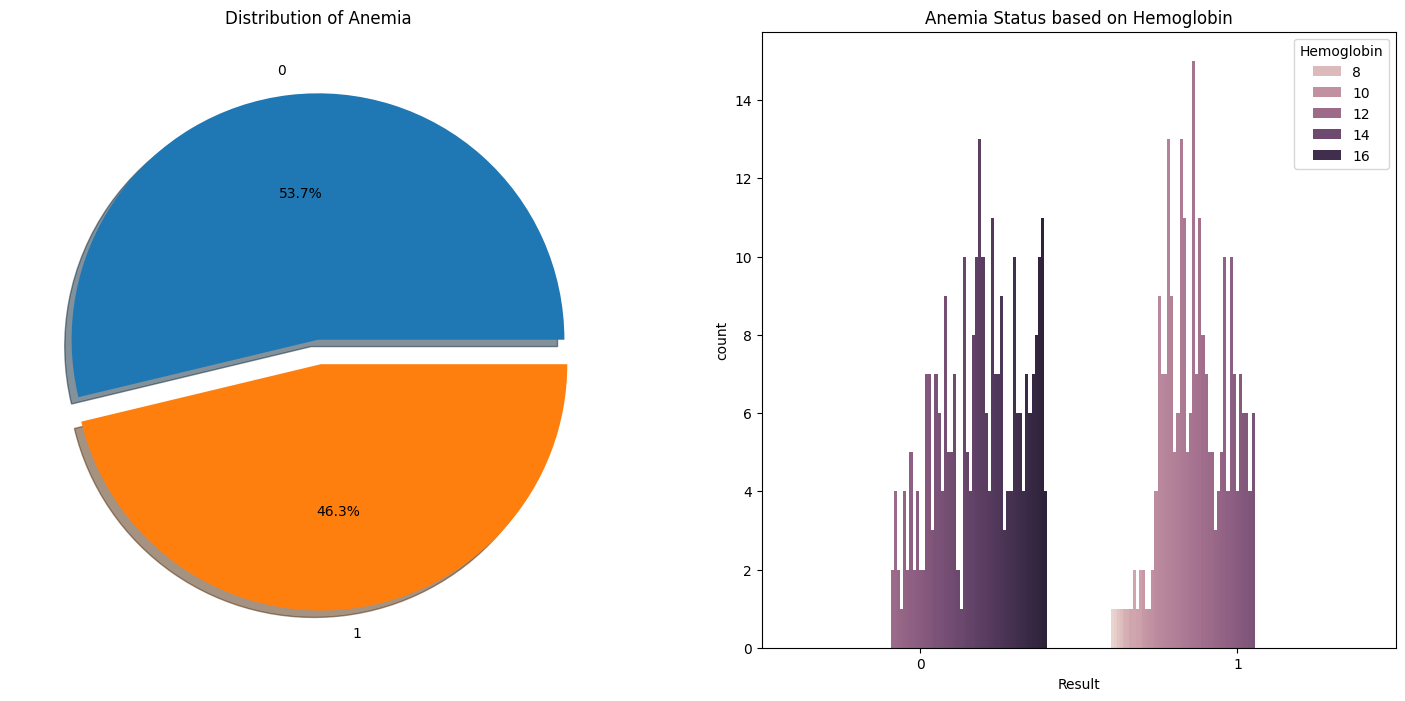

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Result'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Distribution of Anemia')
ax[0].set_ylabel('')
sns.countplot(x='Result', data=data, hue='Hemoglobin', ax=ax[1])
ax[1].set_title('Anemia Status based on Hemoglobin')
plt.show()

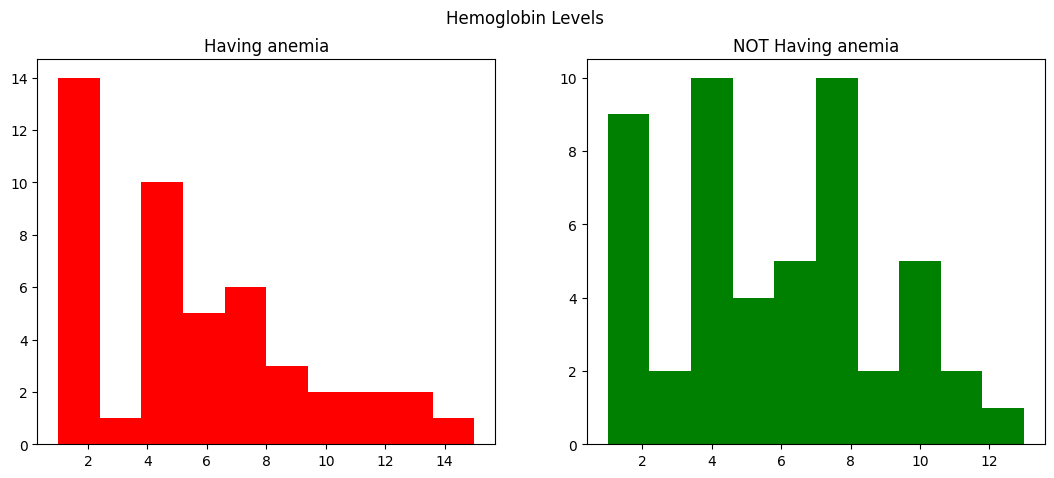

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['Result']==1]['Hemoglobin'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=data[data['Result']==0]['Hemoglobin'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('Hemoglobin Levels')
plt.show()

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
dt=GaussianNB()
dt.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        61
           1       0.90      0.98      0.94        46

    accuracy                           0.94       107
   macro avg       0.94      0.95      0.94       107
weighted avg       0.95      0.94      0.94       107

Accuracy Score: 0.9439252336448598
Confusion Matrix: [[56  5]
 [ 1 45]]


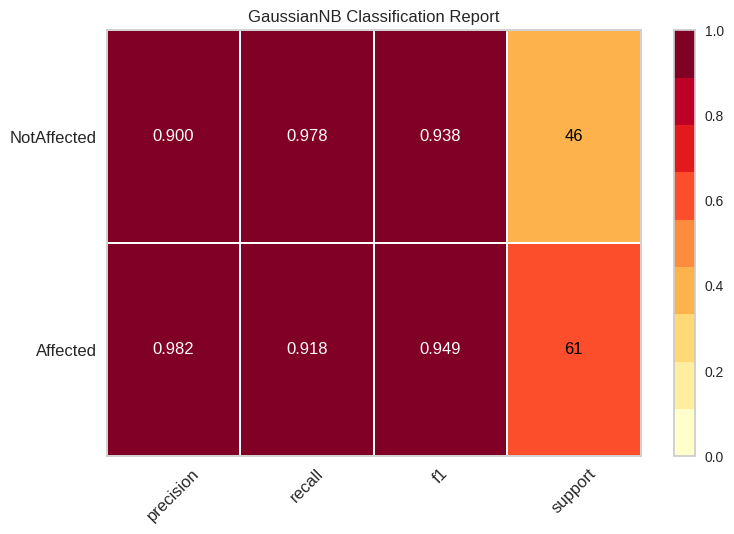

<Axes: title={'center': 'GaussianNB Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport
classes = ["Affected", "NotAffected"]

model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

K NEAREST NEIGHBOR

[1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        61
           1       0.90      0.98      0.94        46

    accuracy                           0.94       107
   macro avg       0.94      0.95      0.94       107
weighted avg       0.95      0.94      0.94       107

Accuracy Score: 0.9439252336448598
Confusion Matrix: [[56  5]
 [ 1 45]]


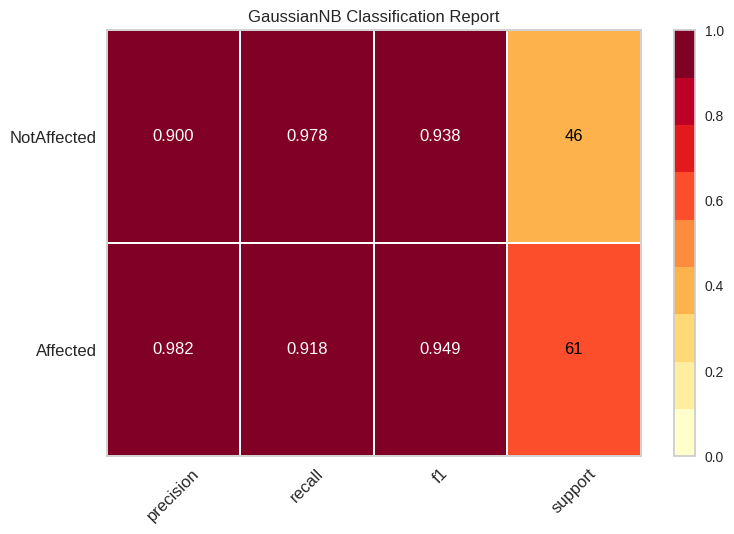

<Axes: title={'center': 'GaussianNB Classification Report'}>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(x_train, y_train)
pred=classifier.predict(x_test)
print(pred)
print(classification_report(y_test,pred))
print("Accuracy Score:",accuracy_score(y_test,pred))
print("Confusion Matrix:",confusion_matrix(y_test,pred))
classes = ["Affected", "NotAffected"]

# model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

model=LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
accuracy=accuracy_score(y_test,prediction.round())

In [ ]:
mse=mean_squared_error(y_test,prediction)
rmse=mean_squared_error(y_test,prediction,squared=False)
mae=mean_absolute_error(y_test,prediction)
r_squared=r2_score(y_test,prediction)

In [ ]:
print("Mean squared error:",mse)
print("Root Mean squared error:",rmse)
print("Mean absolute error:",mae)
print("R-squared:",r_squared)


Mean squared error: 0.082544929488224
Root Mean squared error: 0.28730633388114507
Mean absolute error: 0.24287662700256335
R-squared: 0.6632013906946983


LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model=LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)


In [ ]:
accuracy=metrics.accuracy_score(predictions,y_test)
print('The accuracy of the Logistic Regression model is:',accuracy)

The accuracy of the Logistic Regression model is: 0.9719626168224299


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        61
           1       0.94      1.00      0.97        46

    accuracy                           0.97       107
   macro avg       0.97      0.98      0.97       107
weighted avg       0.97      0.97      0.97       107



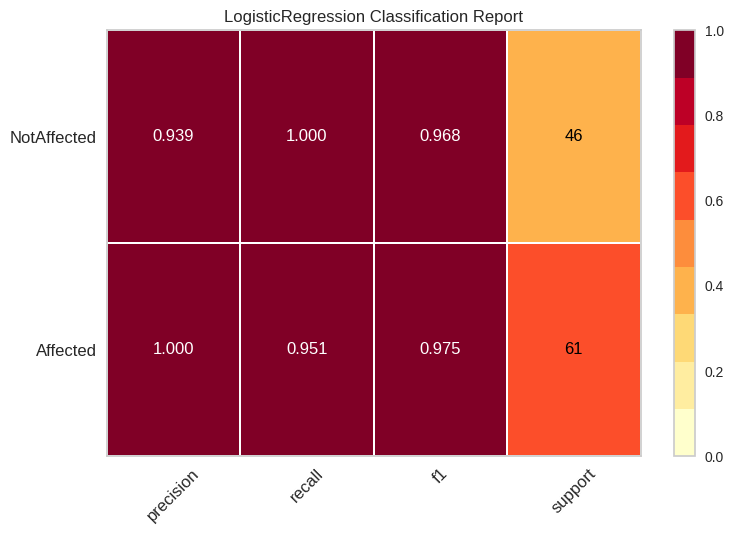

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [ ]:
report=classification_report(y_test,predictions)
print("Classification Report:\n",report)
classes = ["Affected", "NotAffected"]

# model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

ID3 CLASSIFIER

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x,y)
tree_rules = export_text(clf,feature_names=list(x.columns))
print(tree_rules)

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf,fontsize=10)
plt.show()

In [ ]:
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dot_data = export_graphviz(clf, feature_names=x.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='png', cleanup=True)

'decision_tree.png'

In [ ]:
estimator = DecisionTreeClassifier(criterion='entropy')
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)


In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        46

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

Accuracy Score: 1.0


In [ ]:
report=classification_report(y_test,y_pred)
print("Classification Report:\n",report)
classes = ["Affected", "NotAffected"]

# model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        61
           1       0.90      0.98      0.94        46

    accuracy                           0.94       107
   macro avg       0.94      0.95      0.94       107
weighted avg       0.95      0.94      0.94       107



YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!